## LINEAR REGRESSION

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import(mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score, accuracy_score, roc_curve, confusion_matrix, roc_auc_score)

In [12]:
tips=sns.load_dataset("tips")
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
tips.head(7)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2


In [15]:
tips.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [25]:
x = tips[["total_bill"]]
y = tips["tip"]

In [26]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [35]:
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [118]:
acc=accuracy_score(y_test_class,y_pred_class)
cm=confusion_matrix(y_test_class,y_pred_class)
recall=recall_score(y_test_class,y_pred_class)
f1=f1_score(y_test_class,y_pred_class)
auc=roc_auc_score(y_test_class,y_pred_class)
tn,fp,fn,tp=cm.ravel()
specificity=tn/(tn+fp)

print("classification metrics")
print(f"accuracy: {acc:.4f}")
print(f"tp: {tp}")
print(f"tn: {tn}")
print(f"fn: {fn}")
print(f"fp: {fp}")
print(f"recall: {recall:.4f}")
print(f"specificity: {specificity:.4f}")
print(f"f1: {f1:.4f}")
print(f"auc: {auc:.4f}")

classification metrics
accuracy: 0.7959
tp: 11
tn: 28
fn: 4
fp: 6
recall: 0.7333
specificity: 0.8235
f1: 0.6875
auc: 0.7784


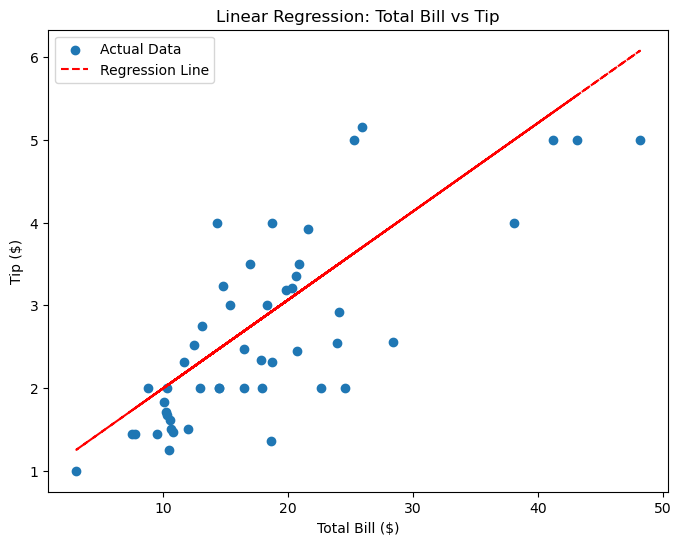

In [59]:
plt.figure(figsize=(8,6))
plt.scatter(x_test, y_test, label="Actual Data")
# regression line
plt.plot(x_test, y_pred, color='red', linestyle="--", label="Regression Line")
plt.title("Linear Regression: Total Bill vs Tip")
plt.xlabel("Total Bill ($)")
plt.ylabel("Tip ($)")
plt.legend()
plt.show()


### Convert regression outputs into classification
### Threshold: median of y_train
### For classification,  the regression output here uses the median body mass 

In [37]:
threshold=np.median(y_train)
y_test_class=(y_test > threshold).astype(int)
y_pred_class=(y_pred > threshold).astype(int)

In [45]:
acc=accuracy_score(y_test_class,y_pred_class)
cm=confusion_matrix(y_test_class,y_pred_class)
recall=recall_score(y_test_class,y_pred_class)
f1=f1_score(y_test_class,y_pred_class)
auc=roc_auc_score(y_test_class,y_pred_class)
tn,fp,fn,tp=cm.ravel()
specificity=tn/(tn+fp)

print("classification metrics")
print(f"accuracy: {acc:.4f}")
print(f"tp: {tp}")
print(f"tn: {tn}")
print(f"fn: {fn}")
print(f"fp: {fp}")
print(f"recall: {recall:.4f}")
print(f"specificity: {specificity:.4f}")
print(f"f1: {f1:.4f}")
print(f"auc: {auc:.4f}")

In [47]:
print("classification metrics")
print(f"accuracy: {acc:.4f}")
print(f"tp: {tp}")
print(f"tn: {tn}")
print(f"fn: {fn}")
print(f"fp: {fp}")
print(f"recall: {recall:.4f}")
print(f"specificity: {specificity:.4f}")
print(f"f1: {f1:.4f}")
print(f"auc: {auc:.4f}")

classification metrics
accuracy: 0.7959
tp: 11
tn: 28
fn: 4
fp: 6
recall: 0.7333
specificity: 0.8235
f1: 0.6875
auc: 0.7784


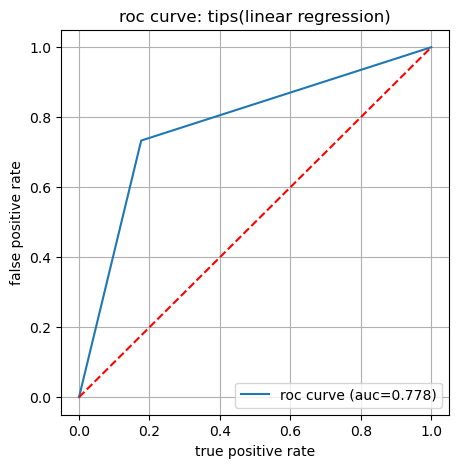

In [50]:
fpr, tpr, threshold=roc_curve(y_test_class,y_pred_class)
plt.figure(figsize=(5,5))
plt.plot(fpr,tpr,label=f"roc curve (auc={auc:.3f})")
plt.plot([0,1],[0,1], linestyle="--",color="red")
plt.xlabel("true positive rate")
plt.ylabel("false positive rate")
plt.title("roc curve: tips(linear regression)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

## Multiple Linear Regression

In [63]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import math

data=sns.load_dataset("penguins")
data.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [68]:
num_imputer=SimpleImputer(strategy="mean")
cat_imputer=SimpleImputer(strategy="most_frequent")

data["bill_length_mm"]=num_imputer.fit_transform(data[["bill_length_mm"]])
data["bill_depth_mm"]=num_imputer.fit_transform(data[["bill_depth_mm"]])
data["flipper_length_mm"]=num_imputer.fit_transform(data[["flipper_length_mm"]])
data["body_mass_g"]=num_imputer.fit_transform(data[["body_mass_g"]])
data["sex"]=cat_imputer.fit_transform(data[["sex"]]).ravel()

In [69]:
data.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [84]:
x=data[["bill_length_mm","bill_depth_mm","flipper_length_mm"]]
y=data["body_mass_g"]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train, x_test ,y_train, y_test,=train_test_split(x,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [85]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=math.sqrt(mse)
r2=r2_score(y_test,y_pred)
print("REGRESSION METRICS")
print(f"mse : {mse:.3f}")
print(f"mae : {mae:.3f}")
print(f"rmse : {rmse:.3f}")
print(f"r2 : {r2:.3f}")

REGRESSION METRICS
mse : 176395.668
mae : 329.908
rmse : 419.995
r2 : 0.715


In [86]:
y_cv=cross_val_predict(model,x_scaled,y,cv=5)
mse_cv=mean_squared_error(y,y_cv)
mae_cv=mean_absolute_error(y,y_cv)
rmse_cv=math.sqrt(mse_cv)
r2_cv=r2_score(y,y_cv)
print("5-FOLD CROSS VALIDATION METRICS")
print(f"mse_cv : {mse:.3f}")
print(f"mae_cv : {mae:.3f}")
print(f"rmse_cv: {rmse:.3f}")
print(f"r2_cv : {r2:.3f}")

5-FOLD CROSS VALIDATION METRICS
mse_cv : 176395.668
mae_cv : 329.908
rmse_cv: 419.995
r2_cv : 0.715


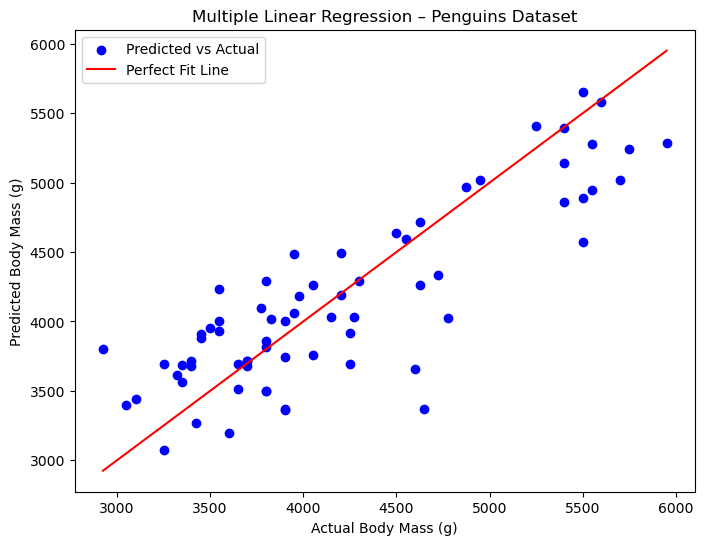

In [88]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color="blue", label="Predicted vs Actual")

# Perfect line
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line, color="red", label="Perfect Fit Line")
plt.xlabel("Actual Body Mass (g)")
plt.ylabel("Predicted Body Mass (g)")
plt.title("Multiple Linear Regression – Penguins Dataset")
plt.legend()
plt.show()

## LASSO REGRESSION

In [92]:
from sklearn.linear_model import Lasso, Ridge

x=data[["bill_length_mm"]]
y=data["body_mass_g"]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train, x_test ,y_train, y_test,=train_test_split(x,y,test_size=0.2,random_state=42)
lasso_model=Lasso(alpha=0.1)
lasso_model.fit(x_train,y_train)
y_pred_lasso=lasso_model.predict(x_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = math.sqrt(mse_lasso)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("=== Lasso Regression Metrics ===")
print(f"MSE: {mse_lasso:.3f}")
print(f"RMSE: {rmse_lasso:.3f}")
print(f"MAE: {mae_lasso:.3f}")
print(f"R²: {r2_lasso:.3f}")

# 5-Fold Cross Validation
y_cv_lasso = cross_val_predict(lasso_model, x_scaled, y, cv=5)
print("Lasso 5-Fold CV MSE:", mean_squared_error(y, y_cv_lasso))

=== Lasso Regression Metrics ===
MSE: 433915.903
RMSE: 658.723
MAE: 531.348
R²: 0.300
Lasso 5-Fold CV MSE: 641484.5256964831


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


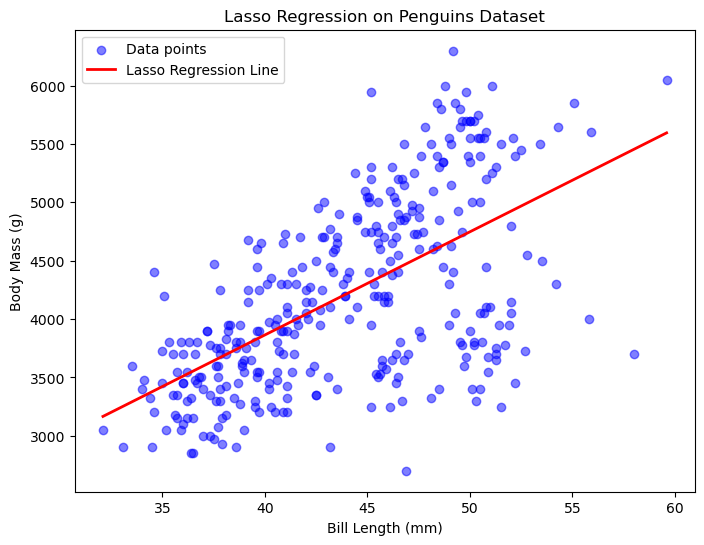

In [99]:
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label="Data points")
# Regression line
x_line = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_line = lasso_model.predict(x_line)

plt.plot(x_line, y_line, color='red', linewidth=2, label="Lasso Regression Line")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Body Mass (g)")
plt.title("Lasso Regression on Penguins Dataset")
plt.legend()
plt.show()

## Ridge Regression

In [102]:
from sklearn.linear_model import Lasso, Ridge

x=data[["bill_length_mm"]]
y=data["body_mass_g"]

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

x_train, x_test ,y_train, y_test,=train_test_split(x,y,test_size=0.2,random_state=42)
ridge_model=Ridge(alpha=1.0)
ridge_model.fit(x_train,y_train)
y_pred_ridge=ridge_model.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = math.sqrt(mse_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("=== ridge Regression Metrics ===")
print(f"MSE: {mse_ridge:.3f}")
print(f"RMSE: {rmse_ridge:.3f}")
print(f"MAE: {mae_ridge:.3f}")
print(f"R²: {r2_ridge:.3f}")

# 5-Fold Cross Validation
y_cv_ridge = cross_val_predict(ridge_model, x_scaled, y, cv=5)
print("Ridge 5-Fold CV MSE:", mean_squared_error(y, y_cv_ridge))

=== ridge Regression Metrics ===
MSE: 433913.763
RMSE: 658.721
MAE: 531.351
R²: 0.300
Ridge 5-Fold CV MSE: 640992.2360368099


## LOGISTIC REGRESSION

Accuracy: 0.8985507246376812

Confusion Matrix:
 [[31  3]
 [ 4 31]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90        34
           1       0.91      0.89      0.90        35

    accuracy                           0.90        69
   macro avg       0.90      0.90      0.90        69
weighted avg       0.90      0.90      0.90        69



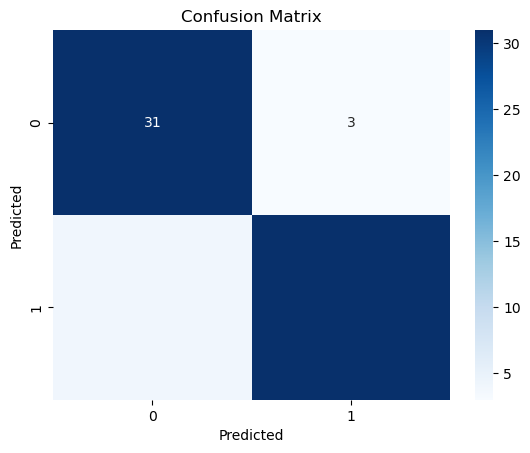

In [106]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

penguins = sns.load_dataset("penguins")

# Select a feature and target
df = penguins[['bill_length_mm', 'species']].dropna()

# Convert species to binary: 1 = Adelie, 0 = Other
df['species_binary'] = df['species'].apply(lambda x: 1 if x == "Adelie" else 0)

X = df[['bill_length_mm']]   # feature
y = df['species_binary']     # binary target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Predicted")
plt.show()

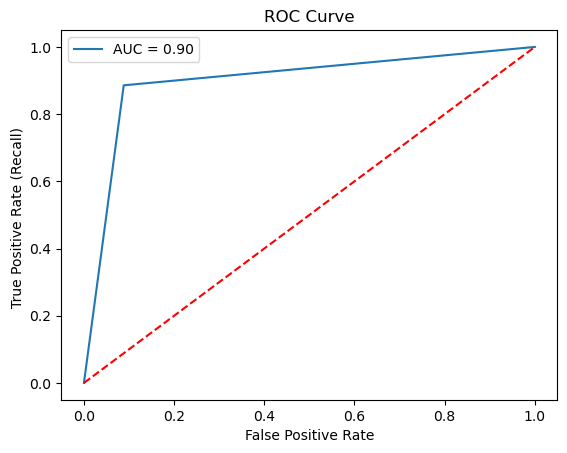

In [108]:
## Roc Curve

fpr,tpr,_=roc_curve(y_test,y_pred)
roc_auc=roc_auc_score(y_test,y_pred)

plt.plot(fpr,tpr,label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1],[0,1],'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall) ")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Polynomial Regression

[  1.   4.   9.  16.  25.  36.  49.  64.  81. 100.]
Intercept :  7.105427357601002e-15 
Coefficients : [ 0.00000000e+00 -1.16123997e-15  1.00000000e+00]


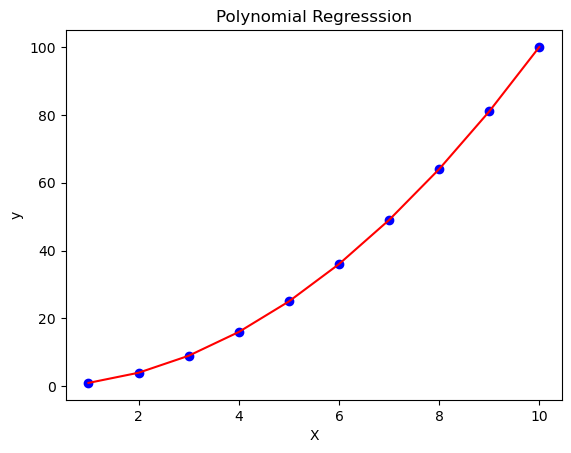

In [117]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
import seaborn as sns

#Sample data
X=np.array([1,2,3,4,5,6,7,8,9,10]).reshape(-1,1) #converts 1-D list to 2-D vector
y=np.array([1,4,9,16,25,36,49,64,81,100])

## Polynomial Regression

poly=PolynomialFeatures(degree=2)  ## create polynomial feature uo tp degree 2
X_poly=poly.fit_transform(X)      ## transform X into polynomial features 

model=LinearRegression()          ## create a linear regression model 
model.fit(X_poly,y)              ## train (fit) the model on polynomisl features
y_pred1=model.predict(X_poly)    ##  predict y values using the polynomial features 
print(y_pred1) 

## Polynomial Equation
intercept=model.intercept_
coef=model.coef_
print(f"Intercept :  {intercept} \nCoefficients : {coef}" )

## Ploting 
plt.scatter(X,y,color="blue")
plt.plot(X,y_pred1,color="red")
plt.title("Polynomial Regresssion")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# K-means Clustering

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


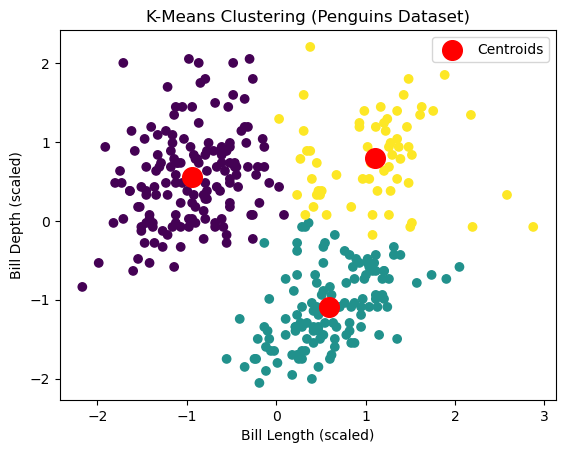

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data = sns.load_dataset("penguins")     # Replace with your CSV file name
data = data[['bill_length_mm', 'bill_depth_mm']].dropna()

X = data.values   # converting to array

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3) K-Means Model
k = 3 
model = KMeans(n_clusters=k, random_state=42)
y_pred = model.fit_predict(X_scaled)

# 4) Visualization of Clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.xlabel("Bill Length (scaled)")
plt.ylabel("Bill Depth (scaled)")
plt.title("K-Means Clustering (Penguins Dataset)")
plt.legend()
plt.show()

# KNN Classifier

In [135]:
# KNN Classifier on Penguins Dataset (CSV)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = sns.load_dataset("penguins")     # Replace with your CSV file name
data = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species']]
data = data.dropna()   # remove missing rows

X = data[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]
y = data['species']

# 3) Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=42)

# 4) Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5) KNN Model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 7) Evaluation
acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", acc)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9902912621359223

Confusion Matrix:
 [[49  1  0]
 [ 0 18  0]
 [ 0  0 35]]

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.98      0.99        50
   Chinstrap       0.95      1.00      0.97        18
      Gentoo       1.00      1.00      1.00        35

    accuracy                           0.99       103
   macro avg       0.98      0.99      0.99       103
weighted avg       0.99      0.99      0.99       103



# Decision Tree

In [136]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Classes :  ['setosa' 'versicolor' 'virginica']
Shape of the Dataset : (150, 4)


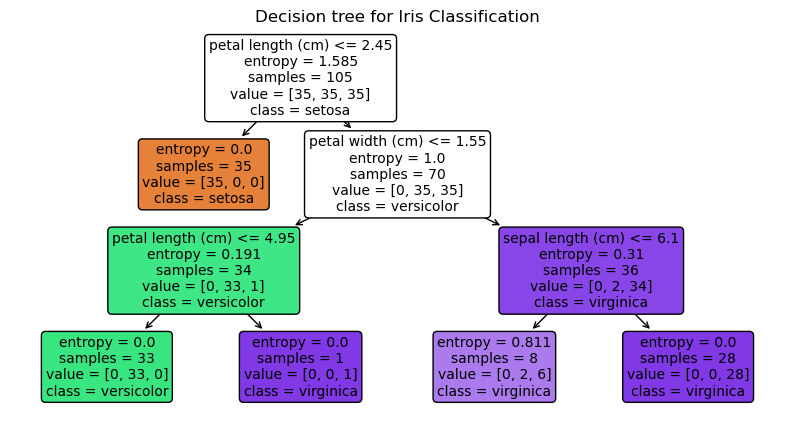

In [143]:
## LOad the Iris Dataset

iris=load_iris()
X=iris.data
y=iris.target

print("Feature Names:",iris.feature_names)
print("Target Classes : ",iris.target_names)
print("Shape of the Dataset :",X.shape)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

## Fit the model
model=DecisionTreeClassifier(criterion="entropy",max_depth=3,random_state=42)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

## Visualize the Decision Tree

plt.figure(figsize=(10,5))
plot_tree(model, filled=True, rounded=True, feature_names=iris.feature_names, class_names=iris.target_names, fontsize=10)
plt.title("Decision tree for Iris Classification")
plt.show()

# Naive Bayes

In [144]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (accuracy_score, confusion_matrix, f1_score, roc_auc_score,roc_curve)

In [145]:
bc = load_breast_cancer()
X = bc.data
y = bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y )
# Train Gaussian Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Compute metrics
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
specificity = tn / (tn + fp)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_prob)
error = 1 - accuracy

# Display results
print("Model Evaluation Metrics:")
print(f"Accuracy     : {accuracy:.4f}")
print(f"Error Rate   : {error:.4f}")
print(f"True Positive: {tp}")
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity  : {specificity:.4f}")
print(f"F1 Score     : {f1:.4f}")
print(f"AUC Score    : {auc:.4f}")

Model Evaluation Metrics:
Accuracy     : 0.9386
Error Rate   : 0.0614
True Positive: 69
True Negative: 38
False Positive: 4
False Negative: 3
Recall (Sensitivity): 0.9583
Specificity  : 0.9048
F1 Score     : 0.9517
AUC Score    : 0.9878


C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hp\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


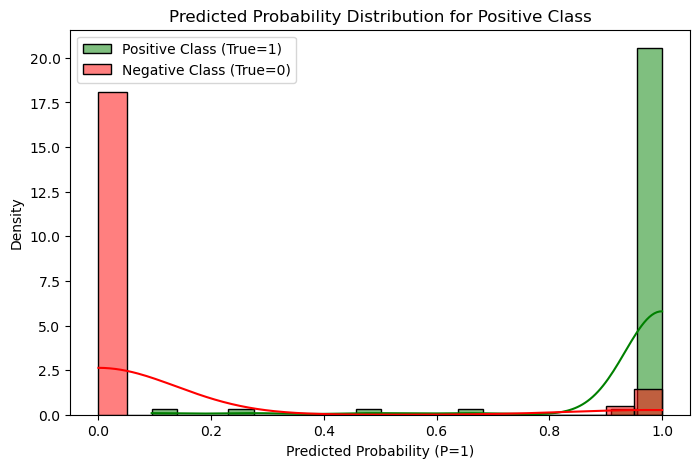

In [146]:
# Plot predicted probability distribution for positive class
plt.figure(figsize=(8,5))
sns.histplot(y_prob[y_test == 1], color="green", label="Positive Class (True=1)", kde=True, stat="density", bins=20)
sns.histplot(y_prob[y_test == 0], color="red", label="Negative Class (True=0)", kde=True, stat="density", bins=20)
plt.title("Predicted Probability Distribution for Positive Class")
plt.xlabel("Predicted Probability (P=1)")
plt.ylabel("Density")
plt.legend()
plt.show()

# Clustering

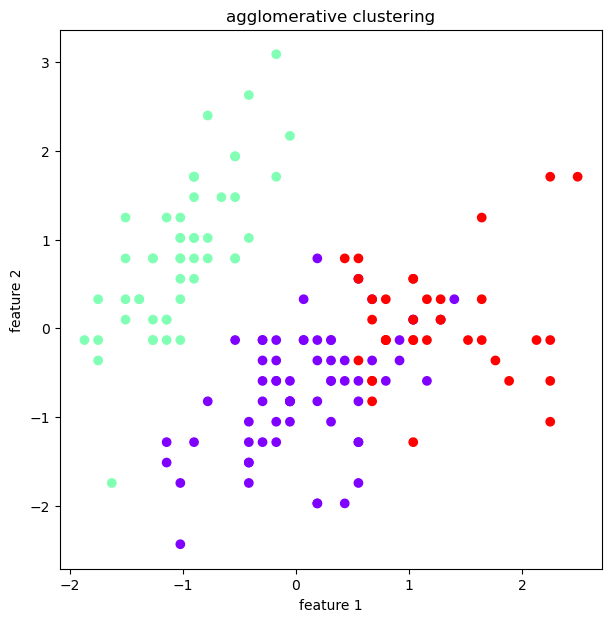

In [147]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

df=sns.load_dataset("iris")
X=df.select_dtypes(include=["float64", "int64"])

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

model=AgglomerativeClustering(n_clusters=3, linkage="ward")
y_pred=model.fit_predict(X)

plt.figure(figsize=(7,7))
plt.scatter(X_scaled[:,0],X_scaled[:,1],c=y_pred,cmap="rainbow")
plt.title("agglomerative clustering")
plt.xlabel('feature 1')
plt.ylabel("feature 2")
plt.show()

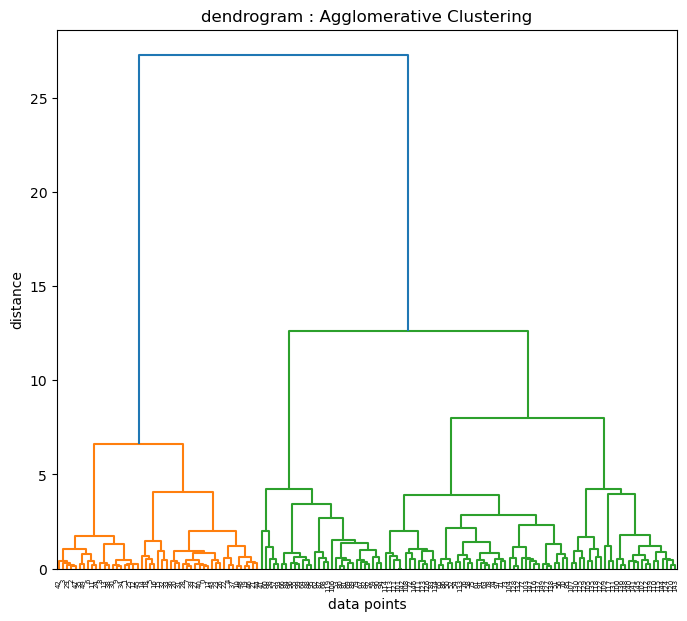

In [148]:
#dendrogram

z=linkage(X_scaled,method="ward")

plt.figure(figsize=(8,7))
dendrogram(z)
plt.title("dendrogram : Agglomerative Clustering")
plt.xlabel('data points')
plt.ylabel('distance')
plt.show()

# SVM

Accuracy: 0.935672514619883
Precision: 0.907563025210084
Recall: 1.0
F1 Score: 0.9515418502202644
Error Rate: 0.06432748538011701
Specificity: 0.8253968253968254

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.90        63
           1       0.91      1.00      0.95       108

    accuracy                           0.94       171
   macro avg       0.95      0.91      0.93       171
weighted avg       0.94      0.94      0.93       171

AUC Value: 0.9930922986478543


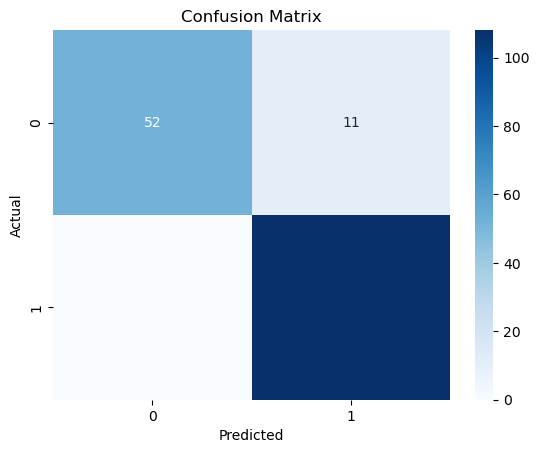

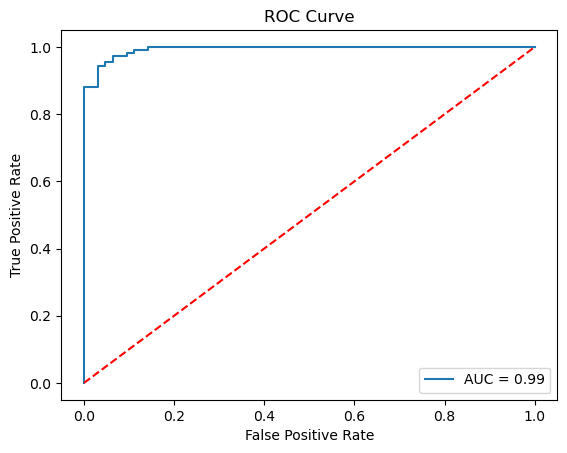

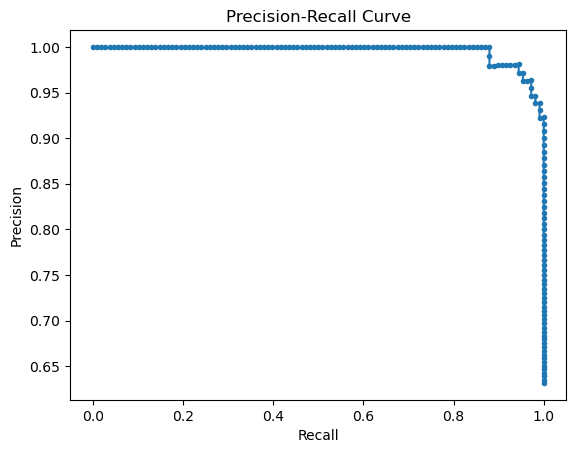

In [149]:
## Importing Libraries
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix, accuracy_score, classification_report,
                             precision_score, recall_score, f1_score,
                             roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.svm import SVC


# Load dataset
bc = load_breast_cancer()
X = bc.data
y = bc.target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# SVM Model
model = SVC(kernel='rbf', probability=True)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Confusion matrix elements
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Metrics
acc = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
error = 1 - acc
specificity = tn / (tn + fp)
auc_value = roc_auc_score(y_test, y_proba)

# Print metrics
print("Accuracy:", acc)
print("Precision:", pr)
print("Recall:", re)
print("F1 Score:", f1)
print("Error Rate:", error)
print("Specificity:", specificity)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("AUC Value:", auc_value)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_value:.2f}")
plt.plot([0,1],[0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()

# ANN

In [151]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Load the built-in dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Build ANN
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')   # Binary classification output
])

# 5. Compile ANN
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

# 6. Train ANN
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.1, verbose=1)

# 7. Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# 8. Predict
sample = X_test[:1]
prediction = model.predict(sample)
print("Prediction Probability:", prediction[0][0])

Epoch 1/50


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7582 - loss: 0.5762 - val_accuracy: 0.8478 - val_loss: 0.4289
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9136 - loss: 0.3574 - val_accuracy: 0.9348 - val_loss: 0.2878
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9451 - loss: 0.2211 - val_accuracy: 0.9348 - val_loss: 0.2104
Epoch 4/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9739 - loss: 0.1541 - val_accuracy: 0.9565 - val_loss: 0.1623
Epoch 5/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9646 - loss: 0.1526 - val_accuracy: 0.9783 - val_loss: 0.1318
Epoch 6/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9662 - loss: 0.1222 - val_accuracy: 0.9783 - val_loss: 0.1161
Epoch 7/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9940 - loss: 0.0674 - val_accuracy: 0.9783 - val_loss: 0.1027
Epoch 8/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9808 - loss: 0.0792 - val_accuracy: 0.9783 - val_loss: 0.0989
Ep